<a href="https://colab.research.google.com/github/Eduardo-Unicamp/pylabs/blob/master/RM15_%2B_FIND_PEAK_exp2_gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install uncertainties

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from IPython.display import display
import os
from uncertainties import ufloat

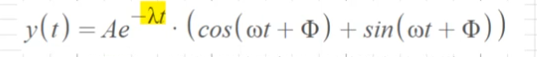

In [77]:
#funções e definições úteis
from math import pi

def sqr(x,grau=2):
    return x**(1/grau)

def damped_sin(t, A, gamma, phi, w):

    return (A * np.exp(-gamma * t) * (np.sin(w * t + phi) ))#usando cos o resultado é igual mas alguns valores da erro e só faz uma reta

In [78]:
main_dir = '/content/drive/MyDrive/F259_Data/exp2'
D = {'d1':[],'d2':[],'d3':[],'d4':[],'d5':[]}

for foldername in os.listdir(main_dir):#pra cada pasta em exp1

    for filename in os.listdir(main_dir+'/'+foldername):#pra cada arquivo
        if filename.endswith(".csv"):
            D[foldername].append(pd.read_csv(main_dir+'/'+foldername+'/'+filename))

In [79]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import numpy as np


def remove_proportional_periods(D, proportion):
    """
    Remove uma quantidade proporcional de períodos dos DataFrames no dicionário D,
    garantindo que o início permaneça em um vale (mínimo local).

    Parâmetros:
        D (dict): Dicionário contendo listas de DataFrames.
        proportion (float): Proporção dos períodos a serem removidos (entre 0 e 1).

    Retorna:
        dict: Novo dicionário D com os DataFrames modificados.
    """
    for key in D:  # Percorre cada conjunto de DataFrames
        for i in range(len(D[key])):
            df = D[key][i]

            # Obtém os valores de tempo e ângulo
            t = df["t"].values
            theta = df["θ"].values

            # Identifica os pontos de vale (mínimos locais)
            min_indices = (np.diff(np.sign(np.diff(theta))) > 0).nonzero()[0] + 1

            num_periods = len(min_indices)  # Número total de períodos detectados

            if num_periods > 0:
                num_periods_to_remove = max(1, int(num_periods * proportion))  # Garante pelo menos 1 período

                if len(min_indices) > num_periods_to_remove:
                    # Encontra o índice do vale que será o novo início
                    new_start_index = min_indices[num_periods_to_remove]

                    # Recorta o DataFrame mantendo a estrutura
                    df_new = df.iloc[new_start_index:].reset_index(drop=True)

                    # Ajusta os tempos para começar em zero
                    df_new["t"] -= df_new["t"].iloc[0]

                    D[key][i] = df_new  # Atualiza no dicionário

    return D

# Exemplo de uso: Remove 20% dos períodos iniciais
proportion_to_remove = 0.2
D = remove_proportional_periods(D, proportion_to_remove)


In [80]:
from scipy.signal import find_peaks
T_list = []
for lista in D.values():
    for df in lista:
        temp_T = []
        # Obtém os índices dos picos
        peak_indices, _ = find_peaks(df['θ'], prominence=1, distance=20)

        # Extraia os valores de θ correspondentes aos picos
        peak_theta = df['θ'].iloc[peak_indices]
        # Extraia os valores de tempo (t) correspondentes aos picos
        peak_t = df['t'].iloc[peak_indices]

        # Calcula os períodos a partir das diferenças entre os tempos dos picos
        periodos = np.diff(peak_t)
        print('PERIODOS:\n', periodos, '\n\n')

        # Calcula o período médio dos primeiros 5 períodos (ajuste conforme necessário)
        periodo_medio = periodos[0:5].mean()
        print("Período médio:", periodo_medio, '\n\n\n')
        temp_T.append(periodo_medio)
    T_list.append(np.average(temp_T))


PERIODOS:
 [1.08333 1.08334 1.08333 1.08333 1.06667 1.08333 1.05    1.1     1.06667
 1.08333 1.06667 1.08333 1.06667 1.08333 1.06667 1.1     1.06667 1.06666
 1.06667 1.08333 1.08334 1.05    1.1     1.05    1.06666 1.1     1.08334
 1.05    1.1     1.05    1.1     1.06666 1.05    1.1    ] 


Período médio: 1.0799999999999996 



PERIODOS:
 [1.06667 1.08333 1.06667 1.1     1.06667 1.08333 1.08333 1.06667 1.08333
 1.08334 1.06666 1.06667 1.08333 1.06667 1.06667 1.1     1.06666 1.08334
 1.08333 1.05    1.06667 1.1     1.06666 1.06667 1.06667 1.08333 1.06667
 1.08333 1.06667 1.08333 1.08333 1.06667 1.06667 1.06666 1.06667] 


Período médio: 1.0766680000000002 



PERIODOS:
 [1.1     1.08334 1.06666 1.08334 1.06666 1.08334 1.08333 1.06667 1.1
 1.06666 1.08334 1.06666 1.08334 1.08333 1.06667 1.06666 1.06667 1.1
 1.05    1.08333 1.08334 1.06666 1.1     1.05    1.06667 1.08333 1.06667
 1.1     1.05    1.06667 1.1     1.06666] 


Período médio: 1.08 



PERIODOS:
 [1.06666 1.1     1.08334 1.08333

In [81]:
print([float(T) for T in T_list])

[1.08, 1.0599994, 1.0933326, 1.2733339999999997, 2.1999994]


In [120]:
def make_graph(X, y, xerr=0, yerr=0):
    # Definição da figura
    fig1 = plt.figure(figsize=(9, 5))
    ax = fig1.add_subplot(1, 1, 1)


    # Ajuste de curva (damped_sin é uma função previamente definida no seu código)
    coeficientes, covariancia = curve_fit(damped_sin, X, y, maxfev=5000)

    # Geração da linha de ajuste
    Xfit = np.linspace(min(X), max(X), len(X))
    yfit = damped_sin(X, *coeficientes)

    # Plotando os dados de amostra com barra de erro
    ax.errorbar(
        X, y,
        xerr=0.001,
        yerr=0.001,
        label='Amostras',
        linestyle='none',
        color='#2635ab',
        marker='d',
        capsize=1,
        ms=2,
        zorder=3
    )

    # Plotando o gráfico de ajuste
    ax.plot(
        Xfit, yfit,
        color='orange',
        label='Curva de Ajuste'
    )

    # Destacando os picos
    peak_indices, _ = find_peaks(y,distance=20,prominence=1)  # Encontrando os picos nos dados
    peak_x = X[peak_indices]
    peak_y = y[peak_indices]

    # Plotando os picos com marcador em formato de círculo vermelho
    ax.scatter(peak_x, peak_y, color='red', label='Picos', zorder=4, s=100, edgecolor='black')

    # Legenda e exibição do gráfico
    ax.legend(loc='best')
    plt.show()

    # Exibindo os coeficientes ajustados
    print(coeficientes)

    return coeficientes, covariancia


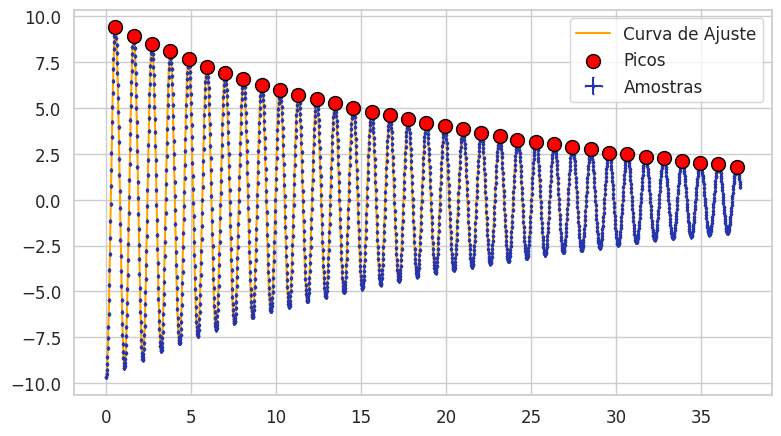

[  9.52785331   0.04458498 -33.05957677   5.8411367 ]


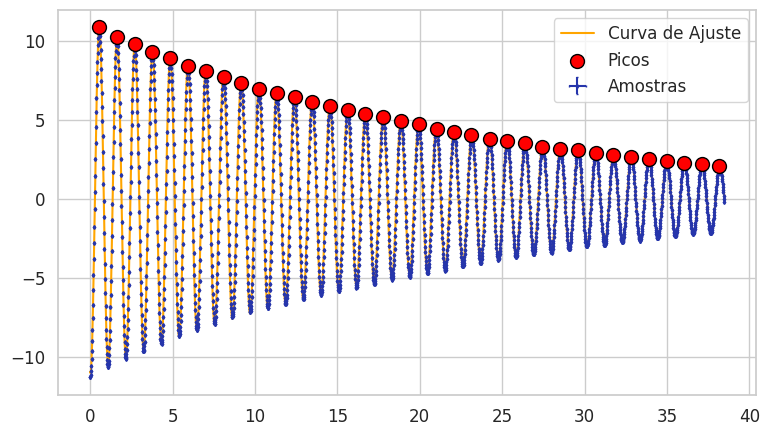

[ 11.02727381   0.04309098 -39.37755869   5.84002698]


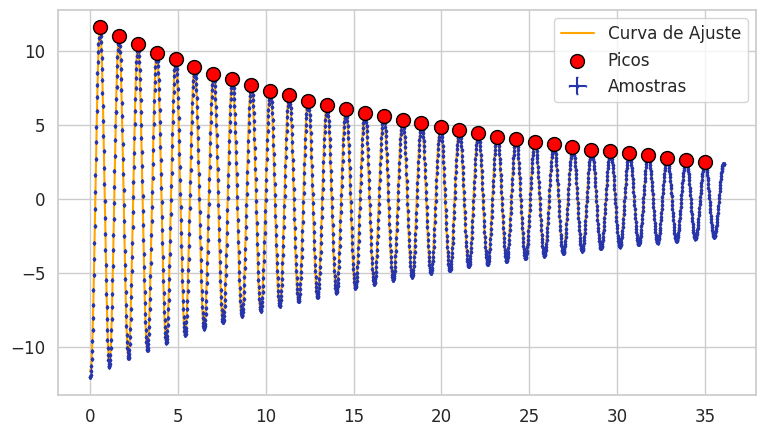

[ 11.65944974   0.04366998 -14.2727817    5.83676353]


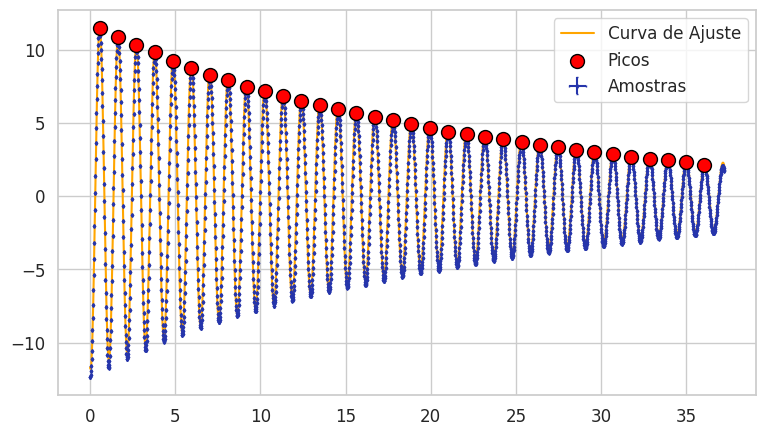

[ 11.81157419   0.04419555 -39.42205063   5.83739759]


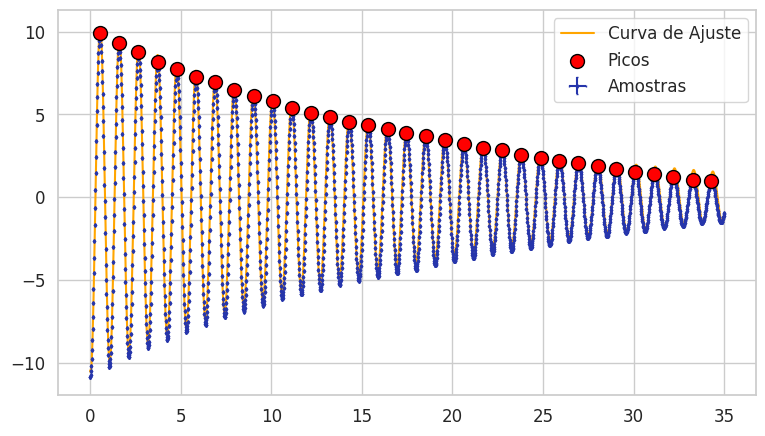

[ 10.59390229   0.05582501 -33.14215079   5.94574775]


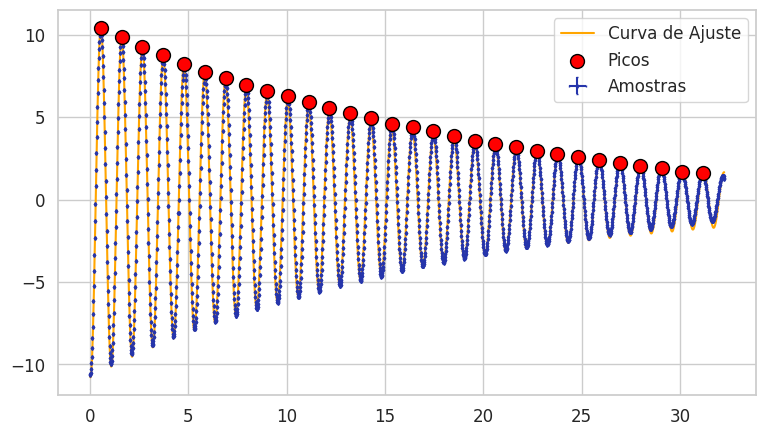

[ 10.79711311   0.05805633 -39.37795596   5.94694314]


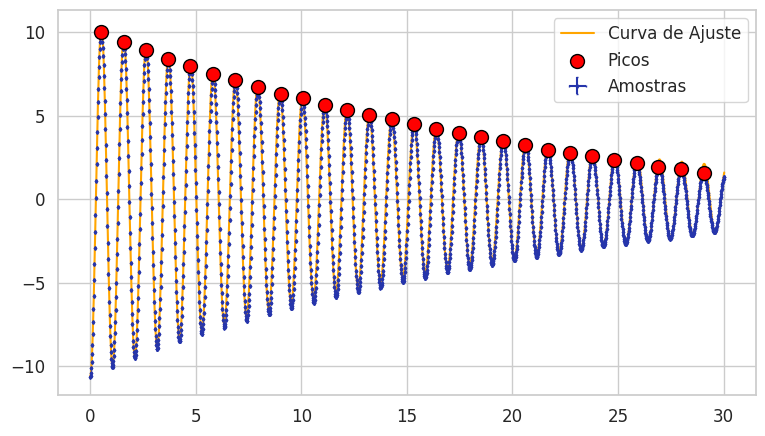

[ 10.59768369   0.05537379 -33.02006078   5.94182136]


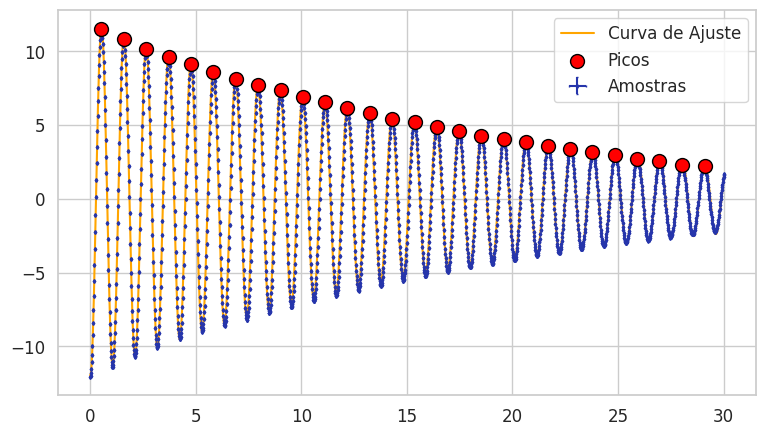

[ 11.97954026   0.05443996 -39.33306533   5.93829457]


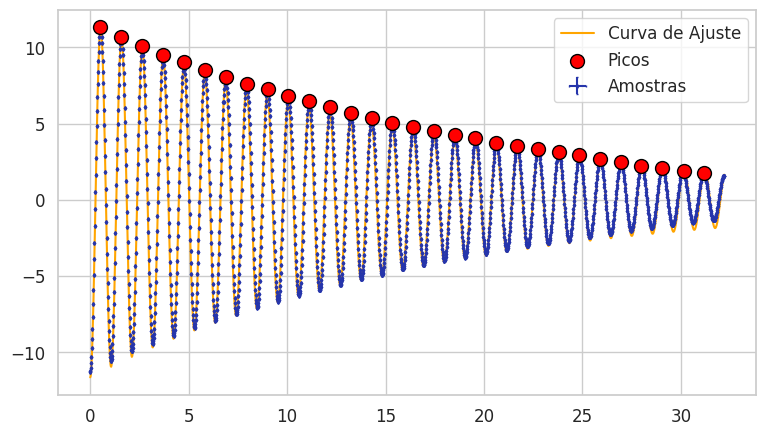

[ 11.64610389   0.05797415 -20.45284061   5.93991456]


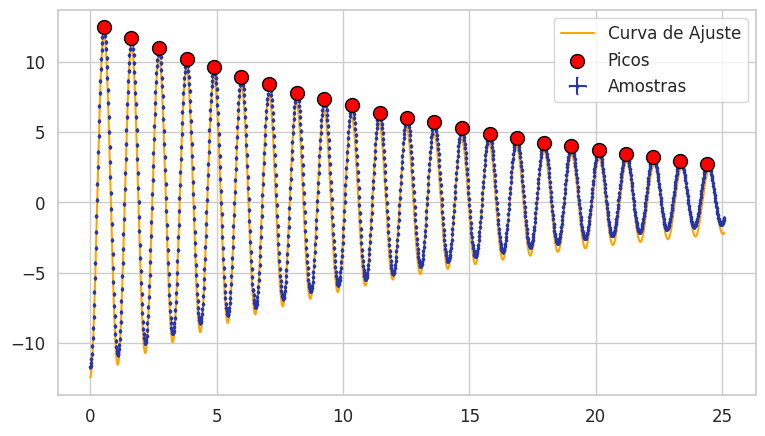

[ 12.4382328    0.06829293 -51.8624759    5.77385057]


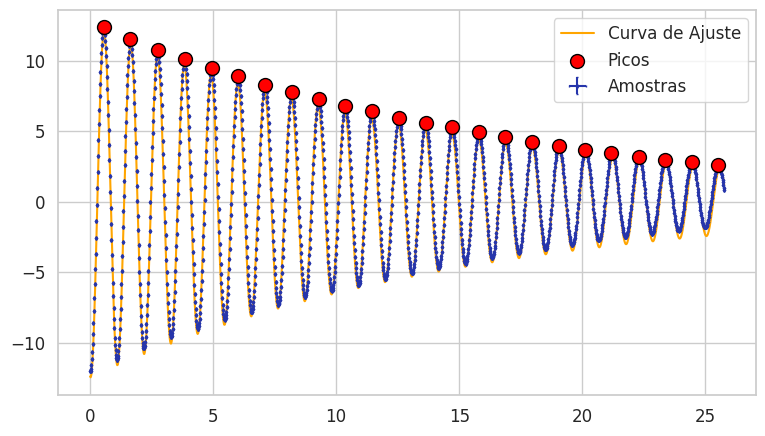

[ 12.45552744   0.06518632 -26.81496936   5.77446262]


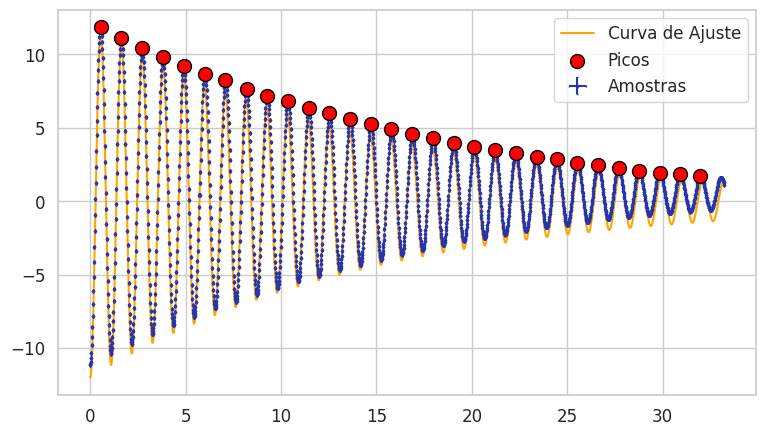

[11.99257483  0.06685522 -7.92074727  5.77753412]


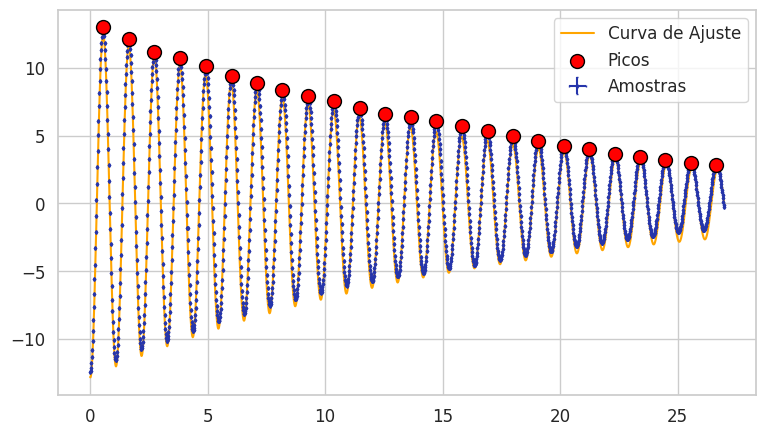

[ 12.82442649   0.06033312 -51.89770471   5.76607136]


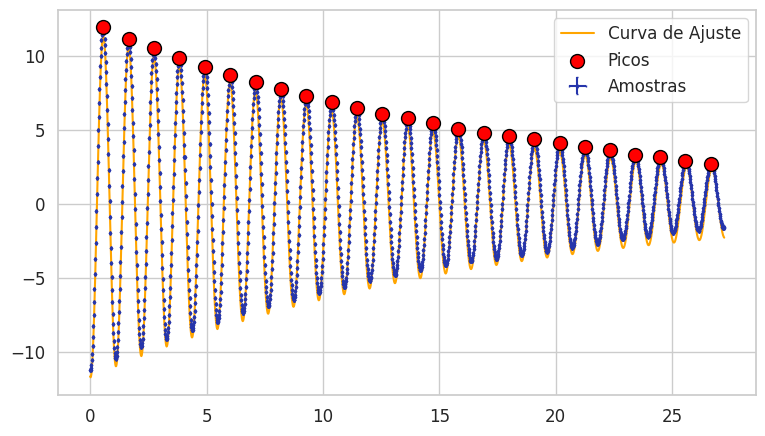

[ 11.74778312   0.05981318 -26.81711171   5.76754277]


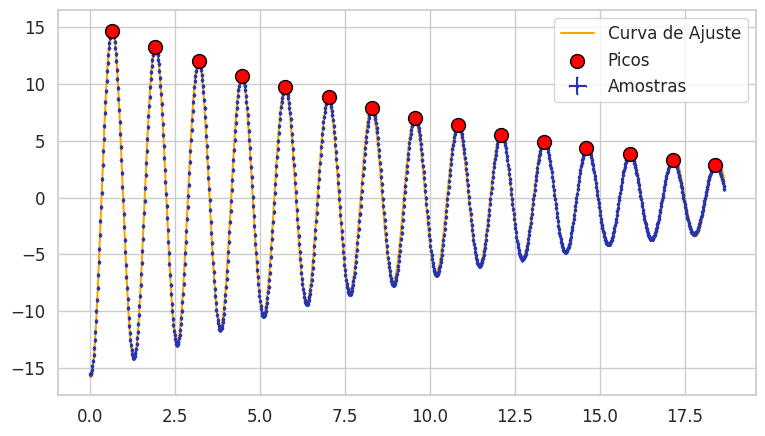

[15.85921649  0.08595072 -1.64713017  4.93977887]


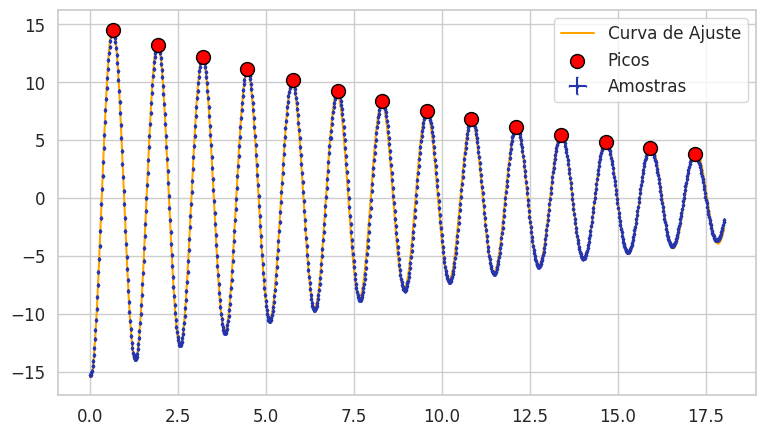

[ 15.51332528   0.07672178 -26.74649818   4.93128088]


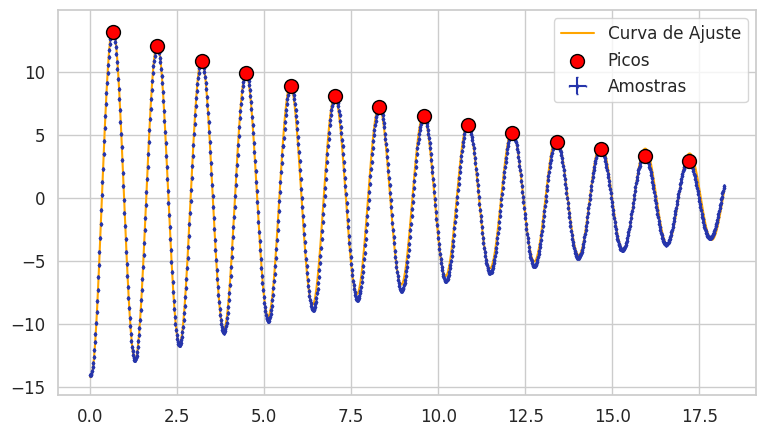

[ 14.27525972   0.08130934 -33.07310272   4.9293657 ]


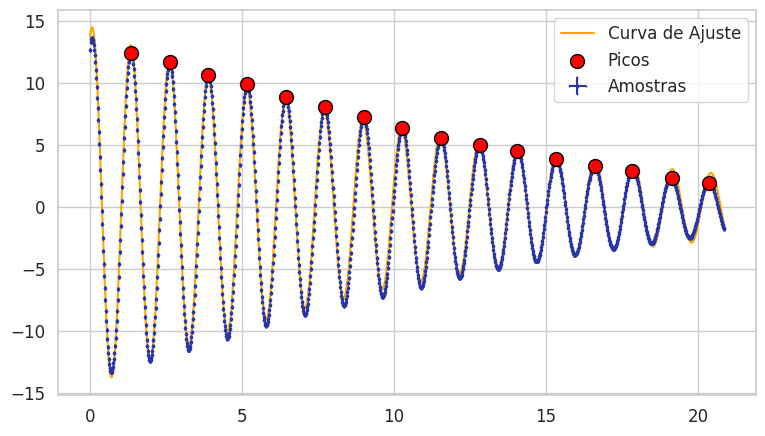

[14.56324454  0.08169571  1.22411789  4.93726627]


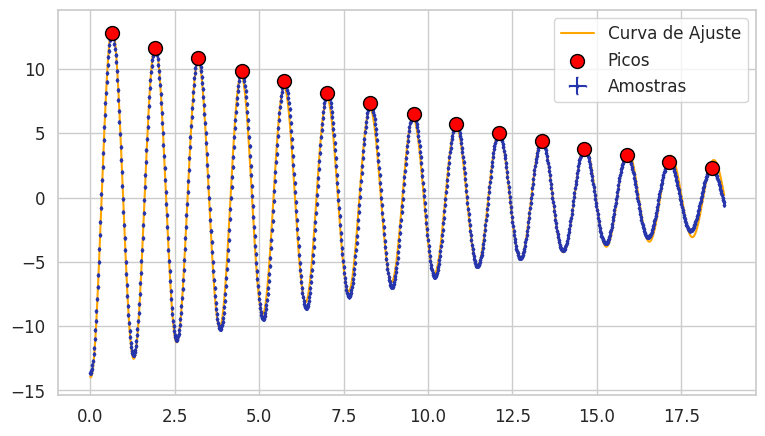

[13.99751945  0.08493655 -1.67264861  4.94033757]


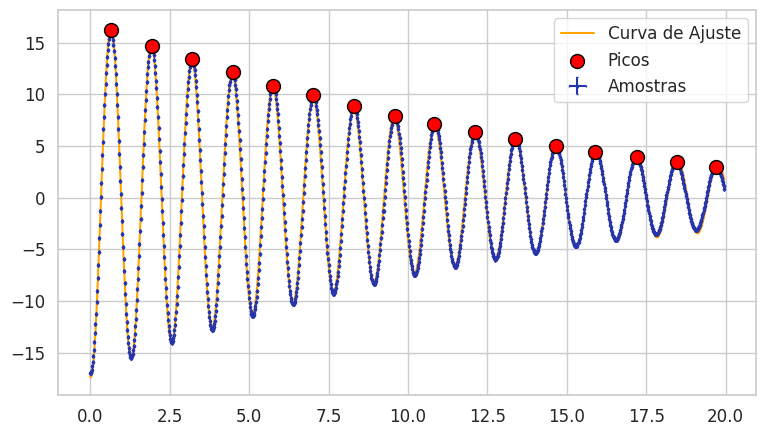

[ 17.43093213   0.08443339 -76.86102746  -4.93702091]


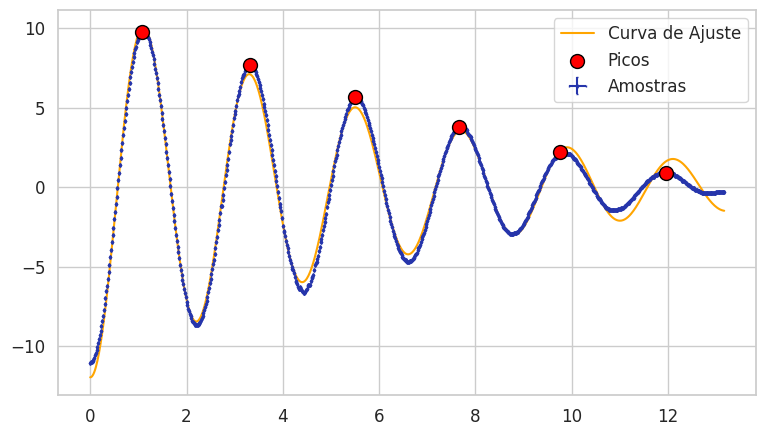

[ 11.98152219   0.15772389 -45.61404709   2.85609249]


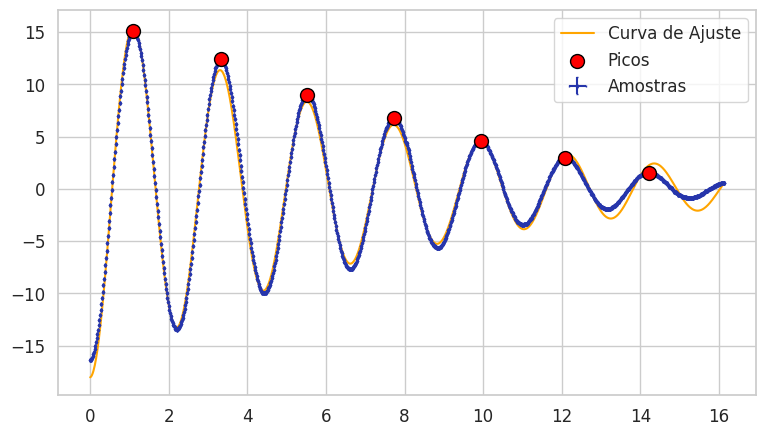

[18.04302068  0.13947717 -1.59083398  2.84365527]


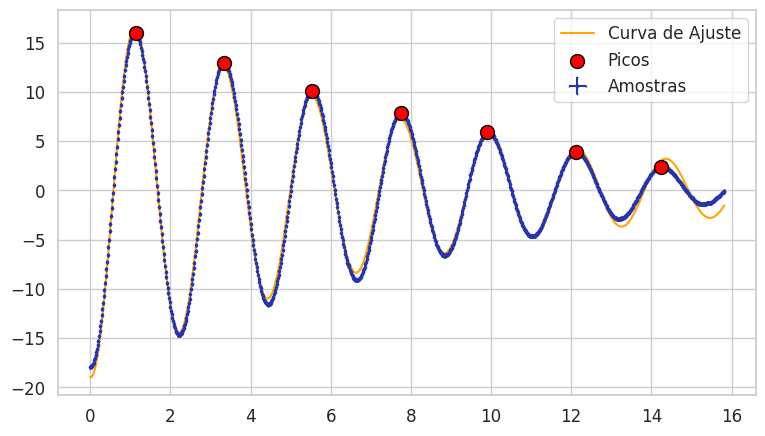

[ 19.0289787    0.12384989 -77.04431633   2.846537  ]


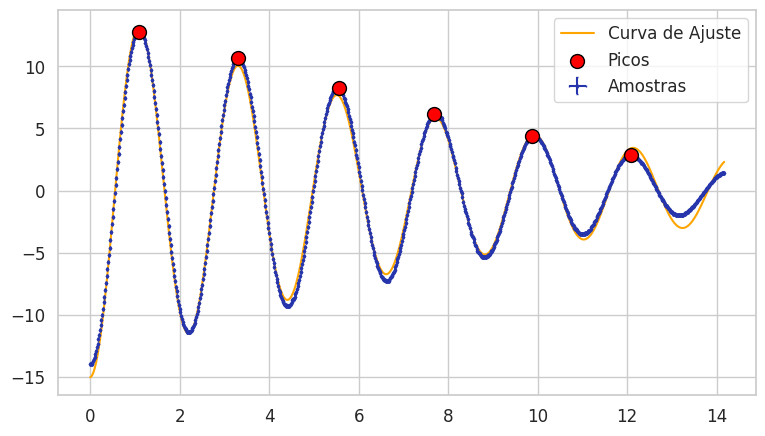

[ 15.02752061   0.12139418 -64.38874736  -2.84605994]


In [121]:

for lista in D.values():
    for df in lista:
        coeficientes, covariancia = make_graph(df['t'],df['θ'])




In [84]:
#Criando lista de distancias
distances_m = [0.172, 0.133, 0.095, 0.052, 0.015]

D_list = [ufloat(x,0.00552268050859363) for x in distances_m]
print(f'\nD_list: {D_list}')


D_list: [0.172+/-0.00552268050859363, 0.133+/-0.00552268050859363, 0.095+/-0.00552268050859363, 0.052+/-0.00552268050859363, 0.015+/-0.00552268050859363]


In [85]:
print(T_list)
T_list = [ufloat(t,0.01) for t in T_list]

[np.float64(1.08), np.float64(1.0599994), np.float64(1.0933326), np.float64(1.2733339999999997), np.float64(2.1999994)]


In [86]:
#Equação do pendulo simples linerizada
#T**2 = (4*(pi**2)*D)/g



In [87]:
#Equação modelo do pendulo físico
#T**2*D = (4*(pi**2)*D**2)/g + k**2*(4*(pi**2))/g

In [93]:
print(T_list)

[1.08+/-0.01, 1.0599994+/-0.01, 1.0933326+/-0.01, 1.2733339999999997+/-0.01, 2.1999994+/-0.01]


PENDULO FÍSICO

[0.029583999999999996, 0.017689000000000003, 0.009025, 0.002704, 0.000225] 
------
 [0.2006208, 0.14943863082404787, 0.11356073655116222, 0.08431173272891196, 0.0725999604000054] 
------
 [0.0018998020949562086, 0.0014690330152859058, 0.0010493092966327897, 0.0005743587728937375, 0.0001656804152578089] 
------
 [0.007436237242046545, 0.006815834157133091, 0.006920801689463235, 0.009051754628538376, 0.026737906057302217]


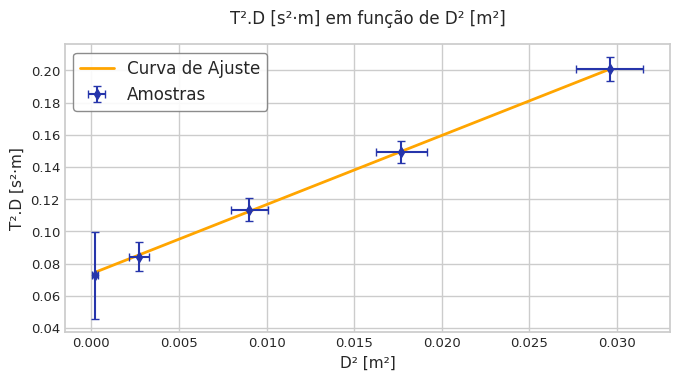

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import ufloat
from scipy.optimize import curve_fit

# Função de ajuste linear
def linear_func(x, a, b):
    return a * x + b

# Configuração do tema do Seaborn (estilo, fonte e paleta de cores)
sns.set_theme(style="whitegrid", font_scale=1.1, rc={"figure.figsize": (7, 4)})
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 12

# Calculando X_com_u e y_com_u
X_com_u = [D**2 for D in D_list]  # D_list deve estar definido

y_com_u = []
for i, T in enumerate(T_list):  # T_list deve estar definido
    y_com_u.append(T**2 * D_list[i])

# Separando valores nominais e incertezas
X = [x.n for x in X_com_u]
xerr = [x.s for x in X_com_u]

y = [y_val.n for y_val in y_com_u]
yerr = [y_val.s for y_val in y_com_u]

print(X, '\n------\n', y, '\n------\n', xerr, '\n------\n', yerr)

# Ajuste linear com erros em y
coeficientes, covariancia = curve_fit(linear_func, X, y, sigma=yerr,absolute_sigma=True)
a, b = coeficientes
a_err = np.sqrt(covariancia[0, 0])
b_err = np.sqrt(covariancia[1, 1])

# Gerando valores para plot do fit
Xfit = np.linspace(min(X), max(X), 50)
yfit = linear_func(Xfit, a, b)

# Criação da figura e do eixo
fig, ax = plt.subplots()

# Plot dos pontos com barras de erro
ax.errorbar(X, y, xerr=xerr, yerr=yerr,
            fmt='d', color='#2635ab', markersize=5,
            capsize=3, linestyle='none', label='Amostras', zorder=3)

# Plot da curva de ajuste
ax.plot(Xfit, yfit, color='orange', lw=2, label='Curva de Ajuste', zorder=1)

# Personalização dos eixos e do grid
ax.set_title("T².D [s²·m] em função de D² [m²]", pad=15)
ax.set_xlabel("D² [m²]")
ax.set_ylabel("T².D [s²·m]")
ax.tick_params(axis='both', direction='in', labelsize=9.5)
ax.grid(True)

# Opcional: definir ticks de forma mais elegante
ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)

# Legenda com borda e fundo transparentes
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('gray')
leg.get_frame().set_alpha(0.9)

plt.tight_layout()
plt.show()



In [89]:
print(f'a: {coeficientes[0]}\n b: {coeficientes[1]}')

a: 4.295693962420834
 b: 0.07369155608339653


In [90]:
print(f'incerteza de a: {covariancia[0][0]}\n incerteza de b: {covariancia[1][1]}')

incerteza de a: 0.14516427845565583
 incerteza de b: 4.77130595349801e-05


In [113]:
g = 4*pi**2/a
print(f'g: {g}')

g: -6.380300903178458


**PÊNDULO SIMPLES**

---






[0.172, 0.133, 0.095, 0.052, 0.015] 
------
 [1.1664, 1.1235987280003599, 1.1953761742227602, 1.6213794755559994, 4.83999736000036] 
------
 [0.00552268050859363, 0.00552268050859363, 0.00552268050859363, 0.00552268050859363, 0.00552268050859363] 
------
 [0.0216, 0.021199988, 0.021866652000000004, 0.025466679999999995, 0.043999988]


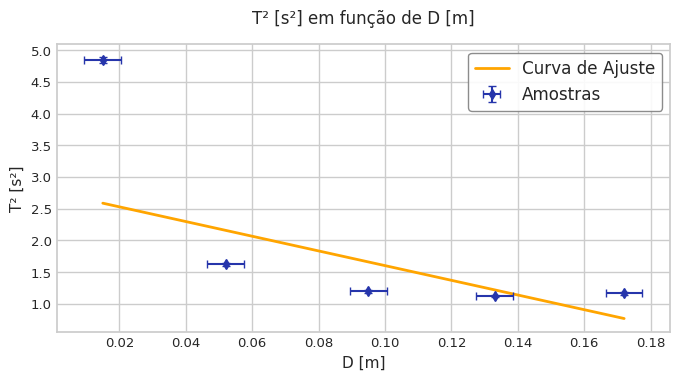

In [115]:


# Configuração do tema do Seaborn (estilo, fonte e paleta de cores)
sns.set_theme(style="whitegrid", font_scale=1.1, rc={"figure.figsize": (7, 4)})
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 12

# Calculando X_com_u e y_com_u
X_com_u = D_list

y_com_u = [T**2 for T in T_list]

# Separando valores nominais e incertezas
X = [x.n for x in X_com_u]
xerr = [x.s for x in X_com_u]

y = [y_val.n for y_val in y_com_u]
yerr = [y_val.s for y_val in y_com_u]

print(X, '\n------\n', y, '\n------\n', xerr, '\n------\n', yerr)

# Ajuste linear com erros em y
coeficientes, covariancia = curve_fit(linear_func, X, y, sigma=yerr,absolute_sigma=True)
a, b = coeficientes
a_err = np.sqrt(covariancia[0, 0])
b_err = np.sqrt(covariancia[1, 1])


# Gerando valores para plot do fit
Xfit = np.linspace(min(X), max(X), 50)
yfit = linear_func(Xfit, a, b)

# Criação da figura e do eixo
fig, ax = plt.subplots()

# Plot dos pontos com barras de erro
ax.errorbar(X, y, xerr=xerr, yerr=yerr,
            fmt='d', color='#2635ab', markersize=5,
            capsize=3, linestyle='none', label='Amostras', zorder=3)

# Plot da curva de ajuste
ax.plot(Xfit, yfit, color='orange', lw=2, label='Curva de Ajuste', zorder=1)


# Personalização dos eixos e do grid
ax.set_title("T² [s²] em função de D [m]", pad=15)
ax.set_xlabel("D [m]")
ax.set_ylabel("T² [s²]")
ax.tick_params(axis='both', direction='in', labelsize=9.5)
ax.grid(True)

# Opcional: definir ticks de forma mais elegante
ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=10)

# Legenda com borda e fundo transparentes
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('gray')
leg.get_frame().set_alpha(0.9)

plt.tight_layout()
plt.show()



In [117]:
print(f'a: {coeficientes[0]}\n b: {coeficientes[1]}')

a: -11.58328531240283
 b: 2.7609123628038263


In [118]:
print(f'incerteza de a: {covariancia[0][0]}\n incerteza de b: {covariancia[1][1]}')

incerteza de a: 0.050731586310966525
 incerteza de b: 0.0007499833263540169


In [119]:
g = 4*pi**2/a
print(f'g: {g}')

g: -3.4082228434868838
